In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
%matplotlib inline

# read pubchem CIDs from files

In [9]:
tables_list=glob.glob("../data/*.txt")
print(tables_list)
CID_dict = {}
cidslist = []
for table in tables_list:
    tableID = table.replace('.txt','')
    tableID = tableID.replace('../data/','')
    CID_dict[tableID] = []
    with open(table) as inf:
        for aline in inf.readlines():
            if aline.startswith('CID')==True:
                #cid = aline.replace('\n')
                CID_dict[tableID].append(aline.replace('\n','').replace('CID: ',''))
                

print(len(CID_dict[tableID]))
CID_dict.keys()
print(CID_dict[tableID][0])

['../data/gastrointestinal.txt', '../data/dermatologic.txt', '../data/urological.txt', '../data/cns.txt', '../data/antiinfective.txt', '../data/antineoplastic.txt', '../data/reproductivecontrol.txt', '../data/lipidregulating.txt', '../data/hematologic.txt', '../data/respiratorysystem.txt', '../data/cardio.txt', '../data/antiinflammatory.txt']
662
134715169


# get SMILES for CIDs

In [11]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

        #c = pcp.Compound.from_cid(v)
        #smiles_dict[key].append(c.isomeric_smiles)
                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))


C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
662


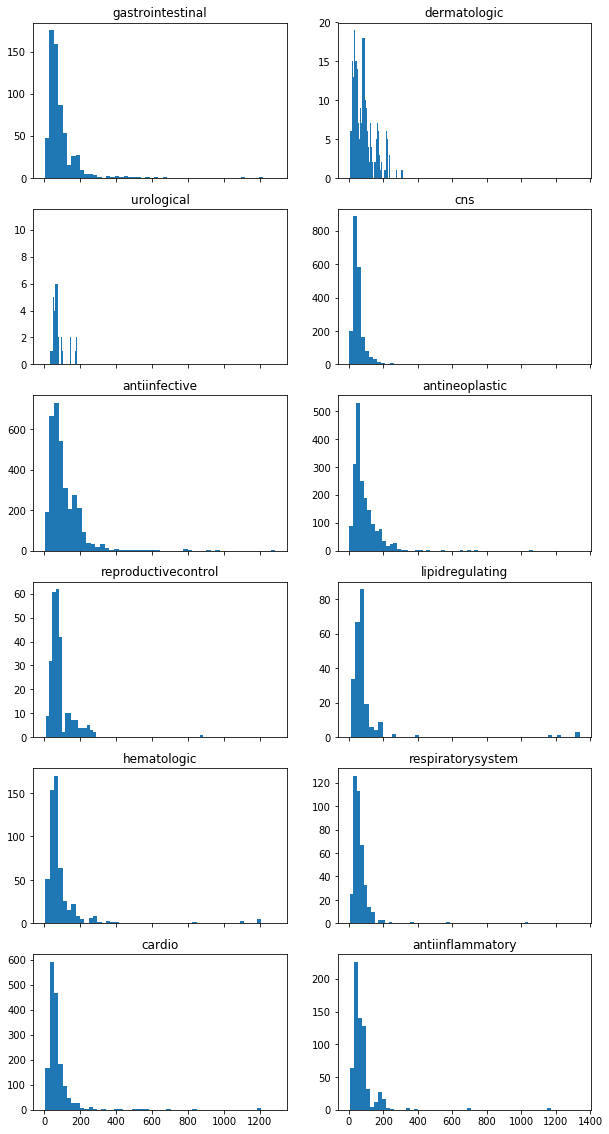

In [57]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

### re-do and only keep things with smiles length <200

In [58]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<200:
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])


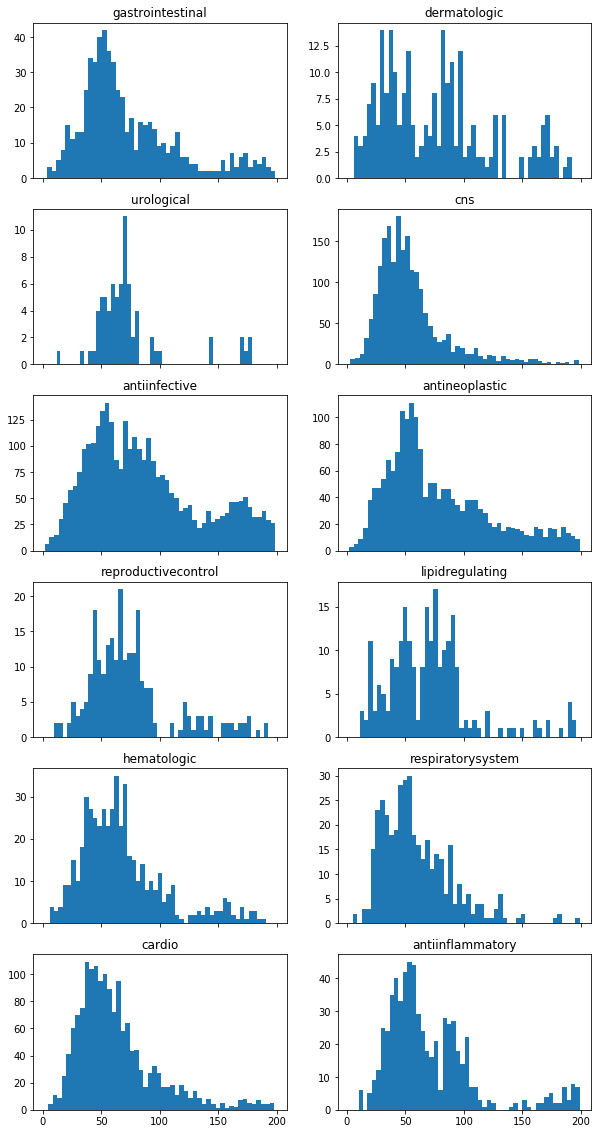

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

# write SMILES to files

In [63]:
for key in smiles_dict.keys():
    with open(key+"_smiles.csv","w") as outfile:
        for smiles in smiles_dict[key]:
            outfile.write(smiles + '\n')

# make JPEGs of SMILES

In [75]:
#x_mol = Chem.MolFromSmiles(str(p[0]['IsomericSMILES']))

for key in smiles_dict.keys():
    n = 0
    os.makedirs(str(key), exist_ok=True)
    for smiles in smiles_dict[key]:
        x_mol = Chem.MolFromSmiles(str(smiles))
        Draw.MolToFile(x_mol, fileName='./'+str(key)+'/'+str(n)+'.png', size=(500, 500), kekulize=True, wedgeBonds=True, imageType="png")
        n +=1

# make .csv with 2 columns, id and class

In [6]:
#pic.names

for file in glob.glob('../data/pics/*' ,recursive=True):
    print(file)

../data/pics/reproductivecontrol
../data/pics/cardio
../data/pics/lipidregulating
../data/pics/respiratorysystem
../data/pics/urological
../data/pics/cns
../data/pics/molecule_pngs.zip
../data/pics/gastrointestinal
../data/pics/antiinfective
../data/pics/hematologic
../data/pics/dermatologic
../data/pics/antineoplastic
../data/pics/antiinflammatory


In [4]:
??glob.glob

In [42]:
files  = !find . "*png"
files

['.',
 './reshape_data.ipynb',
 './fromPubChem',
 './fromPubChem/gastrointestinal.txt',
 './fromPubChem/dermatologic.txt',
 './fromPubChem/urological.txt',
 './fromPubChem/cns.txt',
 './fromPubChem/antiinfective.txt',
 './fromPubChem/antineoplastic.txt',
 './fromPubChem/reproductivecontrol.txt',
 './fromPubChem/lipidregulating.txt',
 './fromPubChem/hematologic.txt',
 './fromPubChem/respiratorysystem.txt',
 './fromPubChem/cardio.txt',
 './fromPubChem/antiinflammatory.txt',
 './.ipynb_checkpoints',
 './.ipynb_checkpoints/reshape_data-checkpoint.ipynb',
 './smiles',
 './smiles/cns_smiles.csv',
 './smiles/hematologic_smiles.csv',
 './smiles/reproductivecontrol_smiles.csv',
 './smiles/antineoplastic_smiles.csv',
 './smiles/antiinflammatory_smiles.csv',
 './smiles/urological_smiles.csv',
 './smiles/respiratorysystem_smiles.csv',
 './smiles/lipidregulating_smiles.csv',
 './smiles/dermatologic_smiles.csv',
 './smiles/gastrointestinal_smiles.csv',
 './smiles/cardio_smiles.csv',
 './smiles/antii

In [48]:
files = !find . -name "*png"

with open("labels.csv", "w") as outfile:
    outfile.write("class,path\n")
    for file in files:    
        drug_class = file.split("/")[2]
        path_to_file = file.split("./pics/")[1]
        path_to_file = path_to_file.split(".png")[0]
        print(drug_class,path_to_file)
        outfile.write(path_to_file + "," + drug_class + "\n")

reproductivecontrol reproductivecontrol/139
reproductivecontrol reproductivecontrol/215
reproductivecontrol reproductivecontrol/4
reproductivecontrol reproductivecontrol/135
reproductivecontrol reproductivecontrol/230
reproductivecontrol reproductivecontrol/187
reproductivecontrol reproductivecontrol/49
reproductivecontrol reproductivecontrol/108
reproductivecontrol reproductivecontrol/23
reproductivecontrol reproductivecontrol/106
reproductivecontrol reproductivecontrol/128
reproductivecontrol reproductivecontrol/131
reproductivecontrol reproductivecontrol/111
reproductivecontrol reproductivecontrol/153
reproductivecontrol reproductivecontrol/179
reproductivecontrol reproductivecontrol/52
reproductivecontrol reproductivecontrol/188
reproductivecontrol reproductivecontrol/7
reproductivecontrol reproductivecontrol/180
reproductivecontrol reproductivecontrol/45
reproductivecontrol reproductivecontrol/19
reproductivecontrol reproductivecontrol/83
reproductivecontrol reproductivecontrol/15

lipidregulating lipidregulating/220
lipidregulating lipidregulating/138
lipidregulating lipidregulating/224
lipidregulating lipidregulating/149
lipidregulating lipidregulating/57
lipidregulating lipidregulating/69
lipidregulating lipidregulating/93
lipidregulating lipidregulating/198
lipidregulating lipidregulating/73
lipidregulating lipidregulating/176
lipidregulating lipidregulating/126
lipidregulating lipidregulating/48
lipidregulating lipidregulating/14
lipidregulating lipidregulating/26
lipidregulating lipidregulating/25
lipidregulating lipidregulating/81
lipidregulating lipidregulating/160
lipidregulating lipidregulating/203
lipidregulating lipidregulating/20
lipidregulating lipidregulating/121
lipidregulating lipidregulating/157
lipidregulating lipidregulating/79
lipidregulating lipidregulating/104
lipidregulating lipidregulating/146
lipidregulating lipidregulating/156
lipidregulating lipidregulating/130
lipidregulating lipidregulating/217
lipidregulating lipidregulating/102
lip

cns cns/452
cns cns/231
cns cns/1226
cns cns/1781
cns cns/1691
cns cns/140
cns cns/1029
cns cns/137
cns cns/607
cns cns/1559
cns cns/295
cns cns/707
cns cns/1258
cns cns/748
cns cns/918
cns cns/1995
cns cns/1270
cns cns/87
cns cns/164
cns cns/59
cns cns/956
cns cns/92
cns cns/1088
cns cns/1787
cns cns/1114
cns cns/68
cns cns/1117
cns cns/466
cns cns/315
cns cns/262
cns cns/470
cns cns/704
cns cns/304
cns cns/624
cns cns/1700
cns cns/774
cns cns/1007
cns cns/1983
cns cns/906
cns cns/619
cns cns/1540
cns cns/424
cns cns/440
cns cns/1603
cns cns/109
cns cns/1571
cns cns/117
cns cns/940
cns cns/816
cns cns/1786
cns cns/1315
cns cns/1704
cns cns/261
cns cns/143
cns cns/1057
cns cns/342
cns cns/1803
cns cns/574
cns cns/934
cns cns/847
cns cns/1919
cns cns/967
cns cns/1475
cns cns/949
cns cns/1900
cns cns/900
cns cns/379
cns cns/1068
cns cns/122
cns cns/1081
cns cns/1630
cns cns/578
cns cns/1792
cns cns/1500
cns cns/423
cns cns/1252
cns cns/1397
cns cns/1793
cns cns/299
cns cns/1575
cns cns/6

antiinfective antiinfective/188
antiinfective antiinfective/2945
antiinfective antiinfective/1408
antiinfective antiinfective/654
antiinfective antiinfective/2369
antiinfective antiinfective/1845
antiinfective antiinfective/2979
antiinfective antiinfective/1301
antiinfective antiinfective/2939
antiinfective antiinfective/1451
antiinfective antiinfective/320
antiinfective antiinfective/2829
antiinfective antiinfective/504
antiinfective antiinfective/447
antiinfective antiinfective/1766
antiinfective antiinfective/2199
antiinfective antiinfective/1509
antiinfective antiinfective/251
antiinfective antiinfective/630
antiinfective antiinfective/2646
antiinfective antiinfective/987
antiinfective antiinfective/2262
antiinfective antiinfective/977
antiinfective antiinfective/2764
antiinfective antiinfective/1558
antiinfective antiinfective/614
antiinfective antiinfective/1413
antiinfective antiinfective/1557
antiinfective antiinfective/2336
antiinfective antiinfective/2234
antiinfective antiin

antiinfective antiinfective/2858
antiinfective antiinfective/1118
antiinfective antiinfective/2504
antiinfective antiinfective/1951
antiinfective antiinfective/783
antiinfective antiinfective/915
antiinfective antiinfective/835
antiinfective antiinfective/1359
antiinfective antiinfective/2072
antiinfective antiinfective/2942
antiinfective antiinfective/833
antiinfective antiinfective/739
antiinfective antiinfective/2948
antiinfective antiinfective/2694
antiinfective antiinfective/2340
antiinfective antiinfective/2398
antiinfective antiinfective/815
antiinfective antiinfective/456
antiinfective antiinfective/2840
antiinfective antiinfective/1316
antiinfective antiinfective/1996
antiinfective antiinfective/2792
antiinfective antiinfective/2242
antiinfective antiinfective/77
antiinfective antiinfective/314
antiinfective antiinfective/3015
antiinfective antiinfective/1264
antiinfective antiinfective/407
antiinfective antiinfective/1915
antiinfective antiinfective/544
antiinfective antiinfe

antineoplastic antineoplastic/576
antineoplastic antineoplastic/921
antineoplastic antineoplastic/632
antineoplastic antineoplastic/227
antineoplastic antineoplastic/792
antineoplastic antineoplastic/539
antineoplastic antineoplastic/126
antineoplastic antineoplastic/1251
antineoplastic antineoplastic/1538
antineoplastic antineoplastic/288
antineoplastic antineoplastic/621
antineoplastic antineoplastic/1312
antineoplastic antineoplastic/955
antineoplastic antineoplastic/1753
antineoplastic antineoplastic/487
antineoplastic antineoplastic/278
antineoplastic antineoplastic/964
antineoplastic antineoplastic/613
antineoplastic antineoplastic/1120
antineoplastic antineoplastic/462
antineoplastic antineoplastic/718
antineoplastic antineoplastic/337
antineoplastic antineoplastic/1297
antineoplastic antineoplastic/1093
antineoplastic antineoplastic/48
antineoplastic antineoplastic/582
antineoplastic antineoplastic/1277
antineoplastic antineoplastic/610
antineoplastic antineoplastic/1394
antine

antiinflammatory antiinflammatory/159
antiinflammatory antiinflammatory/78
antiinflammatory antiinflammatory/210
antiinflammatory antiinflammatory/551
antiinflammatory antiinflammatory/62
antiinflammatory antiinflammatory/553
antiinflammatory antiinflammatory/208
antiinflammatory antiinflammatory/170
antiinflammatory antiinflammatory/507
antiinflammatory antiinflammatory/201
antiinflammatory antiinflammatory/566
antiinflammatory antiinflammatory/522
antiinflammatory antiinflammatory/366
antiinflammatory antiinflammatory/480
antiinflammatory antiinflammatory/267
antiinflammatory antiinflammatory/172
antiinflammatory antiinflammatory/477
antiinflammatory antiinflammatory/254
antiinflammatory antiinflammatory/219
antiinflammatory antiinflammatory/74
antiinflammatory antiinflammatory/273
antiinflammatory antiinflammatory/367
antiinflammatory antiinflammatory/16
antiinflammatory antiinflammatory/211
antiinflammatory antiinflammatory/196
antiinflammatory antiinflammatory/335
antiinflammatory